### Title: Optimizing Supply Chain Management using Machine Learning to Address Supply Chain Disruptions in Instant Noodles Delivery.

#### Written by Hasna Akbar Ali

#### Bussiness Problem : An FMCG company entered into the instant noodles business two years back. Their higher management has noticed that there is a miss match in the demand and supply. Where the demand is high, supply is pretty low and where the demand is low, supply is pretty high. In both ways, it is an inventory cost loss to the company; hence, the higher management wants to optimize the supply quantity in every warehouse in the entire country.

##### Goal & Objective: This exercise aims to build a model, using historical data that will determine the optimum weight of the product to be shipped each time to the warehouse.
#### Also, try to analyze the demand pattern in different pockets of the country so management can drive the advertisement campaign, particularly in those pockets. 
#### This is the first phase of the agreement; hence, the company has shared very limited information. Once you are able to showcase a tangible impact with this much information then the company will open the 360-degree data lake for your consulting company to build a more robust model.


### Import Packages

In [1]:
import numpy as np
import pandas as pd
 
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

#Supress the warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('data.csv')

In [3]:
# Make changes only to the copy of a DataFrame, never the original dataframe

df_copy = df.copy()

In [4]:
df_copy.head(3)

Ware_house_ID WH_Manager_ID Location_type WH_capacity_size   zone  \
0     WH_100000     EID_50000         Urban            Small   West   
1     WH_100001     EID_50001         Rural            Large  North   
2     WH_100002     EID_50002         Rural              Mid  South   

  WH_regional_zone  num_refill_req_l3m  transport_issue_l1y  \
0           Zone 6                   3                    1   
1           Zone 5                   0                    0   
2           Zone 2                   1                    0   

   Competitor_in_mkt  retail_shop_num  ... electric_supply  dist_from_hub  \
0                  2             4651  ...               1             91   
1                  4             6217  ...               1            210   
2                  4             4306  ...               0            161   

   workers_num  wh_est_year  storage_issue_reported_l3m  temp_reg_mach  \
0         29.0          NaN                          13              0   
1         31.0          NaN                           4              0   
2         37.0          NaN                          17              0   

   approved_wh_govt_certificate  wh_breakdown_l3m  govt_check_l3m  \
0                             A                 5              15   
1                             A                 3              17   
2                             A                 6              22   

   product_wg_ton  
0           17115  
1            5074  
2           23137  

[3 rows x 24 columns]

In [5]:
# Analyzing the column names, data types of each column, no of non null values.
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 24 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Ware_house_ID                 25000 non-null  object 
 1   WH_Manager_ID                 25000 non-null  object 
 2   Location_type                 25000 non-null  object 
 3   WH_capacity_size              25000 non-null  object 
 4   zone                          25000 non-null  object 
 5   WH_regional_zone              25000 non-null  object 
 6   num_refill_req_l3m            25000 non-null  int64  
 7   transport_issue_l1y           25000 non-null  int64  
 8   Competitor_in_mkt             25000 non-null  int64  
 9   retail_shop_num               25000 non-null  int64  
 10  wh_owner_type                 25000 non-null  object 
 11  distributor_num               25000 non-null  int64  
 12  flood_impacted                25000 non-null  int64  
 13  f

## Data Cleaning

##### 1. Reformat strings

In [6]:
# Changes made to columns names for easier understanding. 

df_copy.rename(columns = {'Ware_house_ID':'WH_ID',
                          'WH_Manager_ID':'WH_manager_ID',
                          'Location_type':'WH_location_type',
                          'zone':'WH_zone',
                          'wh_owner_type':'WH_owner_type',
                          'Competitor_in_mkt':'competitor_in_mkt',
                          'wh_breakdown_l3m' : 'WH_breakdown_l3m'
                         }, inplace = True)

print(df_copy.columns)

Index(['WH_ID', 'WH_manager_ID', 'WH_location_type', 'WH_capacity_size',
       'WH_zone', 'WH_regional_zone', 'num_refill_req_l3m',
       'transport_issue_l1y', 'competitor_in_mkt', 'retail_shop_num',
       'WH_owner_type', 'distributor_num', 'flood_impacted', 'flood_proof',
       'electric_supply', 'dist_from_hub', 'workers_num', 'wh_est_year',
       'storage_issue_reported_l3m', 'temp_reg_mach',
       'approved_wh_govt_certificate', 'WH_breakdown_l3m', 'govt_check_l3m',
       'product_wg_ton'],
      dtype='object')


In [7]:
df_copy.describe().T

count          mean           std     min  \
num_refill_req_l3m          25000.0      4.089040      2.606612     0.0   
transport_issue_l1y         25000.0      0.773680      1.199449     0.0   
competitor_in_mkt           25000.0      3.104200      1.141663     0.0   
retail_shop_num             25000.0   4985.711560   1052.825252  1821.0   
distributor_num             25000.0     42.418120     16.064329    15.0   
flood_impacted              25000.0      0.098160      0.297537     0.0   
flood_proof                 25000.0      0.054640      0.227281     0.0   
electric_supply             25000.0      0.656880      0.474761     0.0   
dist_from_hub               25000.0    163.537320     62.718609    55.0   
workers_num                 24010.0     28.944398      7.872534    10.0   
wh_est_year                 13119.0   2009.383185      7.528230  1996.0   
storage_issue_reported_l3m  25000.0     17.130440      9.161108     0.0   
temp_reg_mach               25000.0      0.303280      0.459684     0.0   
WH_breakdown_l3m            25000.0      3.482040      1.690335     0.0   
govt_check_l3m              25000.0     18.812280      8.632382     1.0   
product_wg_ton              25000.0  22102.632920  11607.755077  2065.0   

                                25%      50%      75%      max  
num_refill_req_l3m              2.0      4.0      6.0      8.0  
transport_issue_l1y             0.0      0.0      1.0      5.0  
competitor_in_mkt               2.0      3.0      4.0     12.0  
retail_shop_num              4313.0   4859.0   5500.0  11008.0  
distributor_num                29.0     42.0     56.0     70.0  
flood_impacted                  0.0      0.0      0.0      1.0  
flood_proof                     0.0      0.0      0.0      1.0  
electric_supply                 0.0      1.0      1.0      1.0  
dist_from_hub                 109.0    164.0    218.0    271.0  
workers_num                    24.0     28.0     33.0     98.0  
wh_est_year                  2003.0   2009.0   2016.0   2023.0  
storage_issue_reported_l3m     10.0     18.0     24.0     39.0  
temp_reg_mach                   0.0      0.0      1.0      1.0  
WH_breakdown_l3m                2.0      3.0      5.0      6.0  
govt_check_l3m                 11.0     21.0     26.0     32.0  
product_wg_ton              13059.0  22101.0  30103.0  55151.0

#### 2. Reformat data types

In [8]:
# category dtype takes up less memory space and time efficiency
# Get a list of columns with object data type
object_columns = df_copy.select_dtypes(include=['object']).columns

# Convert the object columns to categorical type
df_copy[object_columns] = df_copy[object_columns].astype('category')

In [9]:
df_copy.count()

WH_ID                           25000
WH_manager_ID                   25000
WH_location_type                25000
WH_capacity_size                25000
WH_zone                         25000
WH_regional_zone                25000
num_refill_req_l3m              25000
transport_issue_l1y             25000
competitor_in_mkt               25000
retail_shop_num                 25000
WH_owner_type                   25000
distributor_num                 25000
flood_impacted                  25000
flood_proof                     25000
electric_supply                 25000
dist_from_hub                   25000
workers_num                     24010
wh_est_year                     13119
storage_issue_reported_l3m      25000
temp_reg_mach                   25000
approved_wh_govt_certificate    24092
WH_breakdown_l3m                25000
govt_check_l3m                  25000
product_wg_ton                  25000
dtype: int64

#### 3. Address missing values

In [10]:
# Identify the null values

null_cols = df_copy.columns[df_copy.isnull().any()].tolist() # workers_num, wh_est_year, approved_wh_govt_certificate are the columns with null values
percentage_of_nulls = (df_copy[null_cols].isnull().sum()/len(df_copy))

# (or) df_copy.isnull().mean()*100 

# What percentage of the column is null
print(percentage_of_nulls)

workers_num                     0.03960
wh_est_year                     0.47524
approved_wh_govt_certificate    0.03632
dtype: float64


In [11]:
# Apply CCA (Complete Case Analysis) to manage null values
# We can drop null values only if missing data in columns is less thaan 4%
# workers_num, approved_wh_govt_certificate

# Capture those columns with less than 4%
drop_nulls = [i for i in null_cols if percentage_of_nulls[i] < 0.04]

# Check what % of data will remain if you drop those columns
len(df_copy.dropna(subset=drop_nulls)) / len(df_copy)

# 92.536% of the data remains, we can drop these values
df_copy.dropna(subset=drop_nulls, inplace=True)

# Display the updated shape of the DataFrame
df_copy.shape

(23134, 24)

In [12]:
df_copy.drop(columns=['wh_est_year'],inplace=True)

#### 4. Address duplicate values

In [13]:
duplicates = df.duplicated()
print(duplicates.sum())
# There are no duplicates in the dataset

0


#### 5. Address the outliers

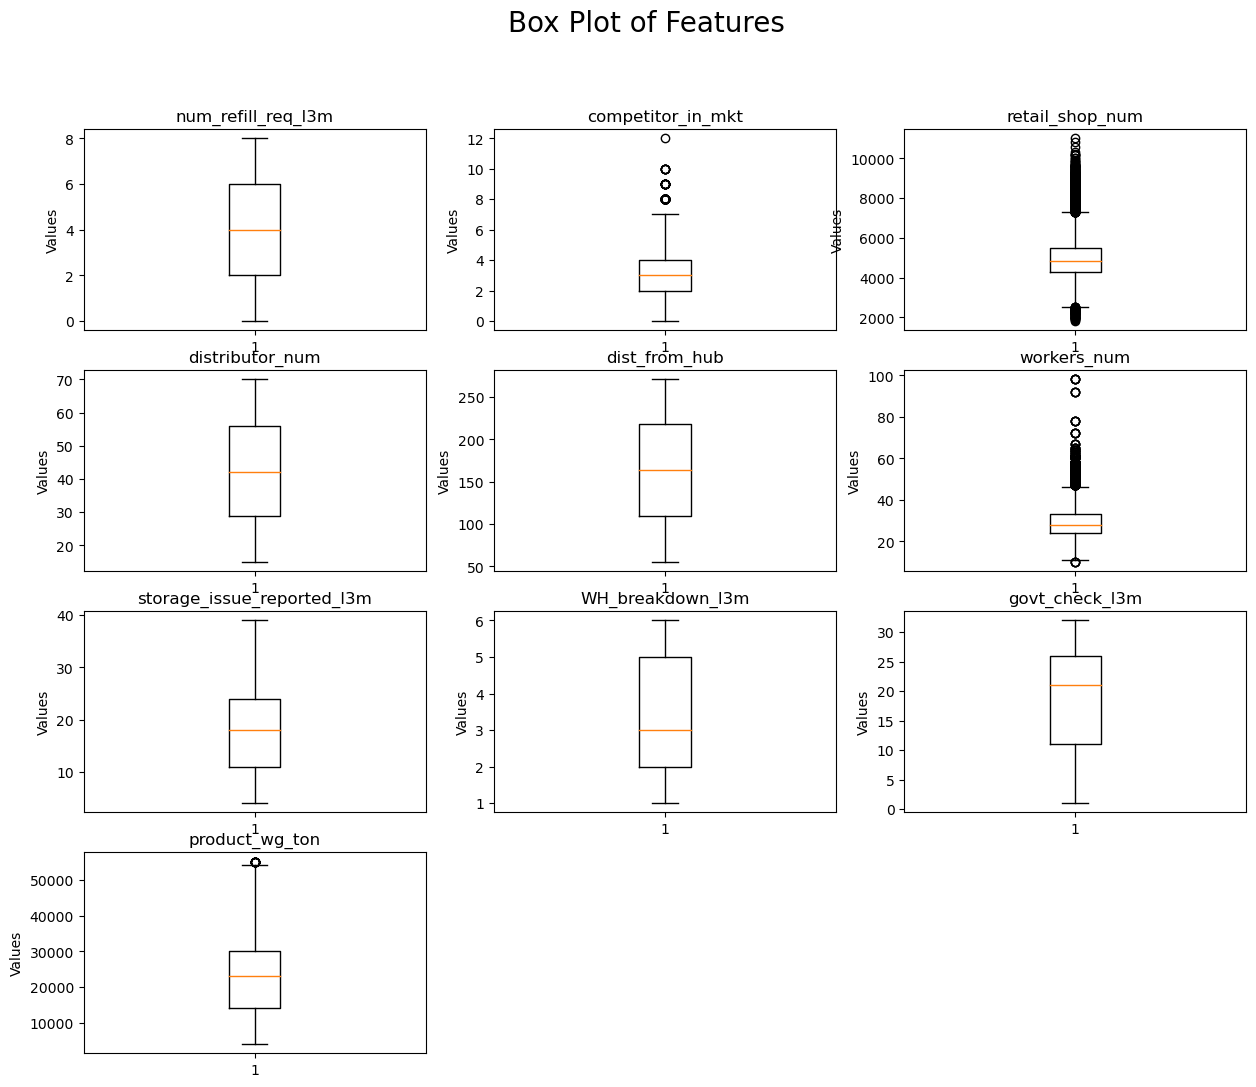

In [14]:
# Checking columns with int64,float64 datatype for outliers
int_columns = df_copy.select_dtypes(include=['int64','float64'])

# Columns like 'electric_supply','flood_impacted', 'flood_proof','temp_reg_mach' have 0,1 values ie YES or NO,
# We can consider them as categorical 
# 'transport_issue_l1y' is also considered as a categorical value

int_columns.drop(columns=['electric_supply','flood_impacted', 'flood_proof','temp_reg_mach','transport_issue_l1y'],inplace=True)

plt.figure(figsize=(15, 12))
plt.suptitle('Box Plot of Features', fontsize=20)

for i, col in enumerate(int_columns.columns):
    plt.subplot(4, 3, i + 1)  # Create a subplot
    plt.boxplot(int_columns[col])      # Create the box plot
    plt.title(col)            # Set the title
    plt.ylabel('Values')
    
plt.show()  # Display the plots

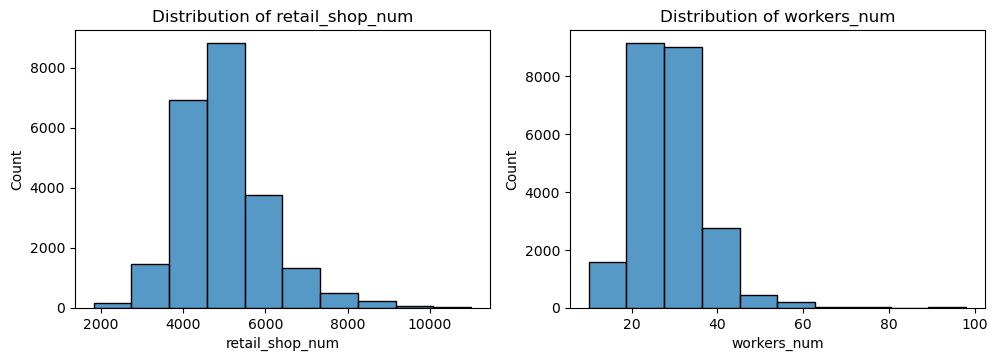

In [15]:
# These columns seem to have outliers. 
# 'retail_shop_num','workers_num','transport_issue_l1y','competitor_in_mkt' 
# Further analyzing how these features are distributed

df_outliers = int_columns[['retail_shop_num','workers_num']]

plt.figure(figsize=(15, 10))

for i, col in enumerate(df_outliers.columns):
    plt.subplot(3, 3, i+1)
    sns.histplot(df_outliers[col], bins=10)
    plt.title(f'Distribution of {col}')

plt.tight_layout()
plt.show()


In [16]:
# Columns that have outliers
columns_to_check = ['retail_shop_num', 'workers_num',]

# Calculate the IQR (Interquartile Range) for the selected columns
q1 = df_outliers[columns_to_check].quantile(0.25)
q3 = df_outliers[columns_to_check].quantile(0.75)
iqr = q3 - q1

# Calculate the lower and upper bounds for outlier detection
lower_limit = q1 - 1.5 * iqr
upper_limit = q3 + 1.5 * iqr

# Identify outliers in the selected columns
outliers = ((df_outliers[columns_to_check] < lower_limit) | (df_outliers[columns_to_check] > lower_limit))

# Count the number of outliers in each column
outliers_count = outliers.sum()

# print("Number of outliers in each column:")
# print(outliers_count)

# retail_shop_num      860
# workers_num          580

# Capping technique used to treat outliers as they are a significant number of values. 

for col in columns_to_check:
    ll, ul = lower_limit[col], upper_limit[col]
    df_copy[col] = np.where(df_copy[col] > ul, ul, df_copy[col])
    df_copy[col] = np.where(df_copy[col] < ll, ll, df_copy[col])


#### 6. Remove irrelevant observations

In [17]:
# Count of WH_Manager_ID indicates that its completely unique through out the DataFrame
print('Count of WH_manager_ID:',df_copy['WH_manager_ID'].value_counts().sum())
# Count of WH_ID indicates that its completely unique through out the DataFrame
print('Count of WH_ID:',df_copy['WH_ID'].value_counts().sum())

# These two features have no contribution towards our target variable ie product_wg_ton
# Hence, we can drop them.

df_copy.drop(columns=['WH_manager_ID','WH_ID'],inplace=True)

Count of WH_manager_ID: 23134
Count of WH_ID: 23134


## EDA (Exploratory Data Analysis)

In [18]:
# Some columns identified as integer even though the behviour is categorical
# Converting it into categorical temperorily for analysis
# 'electric_supply','flood_impacted', 'flood_proof','temp_reg_mach'

# List of column names you want to convert to categorical
columns_to_convert = ['electric_supply','flood_impacted', 'flood_proof','temp_reg_mach',]

# Convert the specified columns to categorical type
for column in columns_to_convert:
    df_copy[column] = df_copy[column].astype('category')

#### 1 (a) Univariate non-graphical EDA for Categorical Data

In [19]:
df_copy.describe(exclude=['int64','float64']).T

count unique            top   freq
WH_location_type              23134      2          Rural  21167
WH_capacity_size              23134      3          Large   9414
WH_zone                       23134      4          North   9505
WH_regional_zone              23134      6         Zone 6   7716
WH_owner_type                 23134      2  Company Owned  12658
flood_impacted                23134      2              0  20992
flood_proof                   23134      2              0  21976
electric_supply               23134      2              1  15116
temp_reg_mach                 23134      2              0  15876
approved_wh_govt_certificate  23134      5              C   5286

#### 1 (b) Univariate non-graphical EDA for Numerical Data

In [20]:
df_copy.describe().T

count          mean           std     min  \
num_refill_req_l3m          23134.0      4.089046      2.607848     0.0   
transport_issue_l1y         23134.0      0.779286      1.203840     0.0   
competitor_in_mkt           23134.0      3.109233      1.144868     0.0   
retail_shop_num             23134.0   4958.118916    970.181384  2527.5   
distributor_num             23134.0     42.420982     16.050677    15.0   
dist_from_hub               23134.0    163.445881     62.735082    55.0   
workers_num                 23134.0     28.766750      7.287503    10.5   
storage_issue_reported_l3m  23134.0     17.787715      8.697196     4.0   
WH_breakdown_l3m            23134.0      3.613599      1.577423     1.0   
govt_check_l3m              23134.0     18.826792      8.632020     1.0   
product_wg_ton              23134.0  22745.670096  11347.951617  4055.0   

                                25%      50%      75%      max  
num_refill_req_l3m              2.0      4.0      6.0      8.0  
transport_issue_l1y             0.0      0.0      1.0      5.0  
competitor_in_mkt               2.0      3.0      4.0     12.0  
retail_shop_num              4311.0   4859.0   5500.0   7283.5  
distributor_num                29.0     42.0     56.0     70.0  
dist_from_hub                 109.0    164.0    218.0    271.0  
workers_num                    24.0     28.0     33.0     46.5  
storage_issue_reported_l3m     11.0     18.0     24.0     39.0  
WH_breakdown_l3m                2.0      3.0      5.0      6.0  
govt_check_l3m                 11.0     21.0     26.0     32.0  
product_wg_ton              14072.0  23066.0  30131.0  55151.0

#### 2 (a) Univariate graphical EDA for Categorical Data

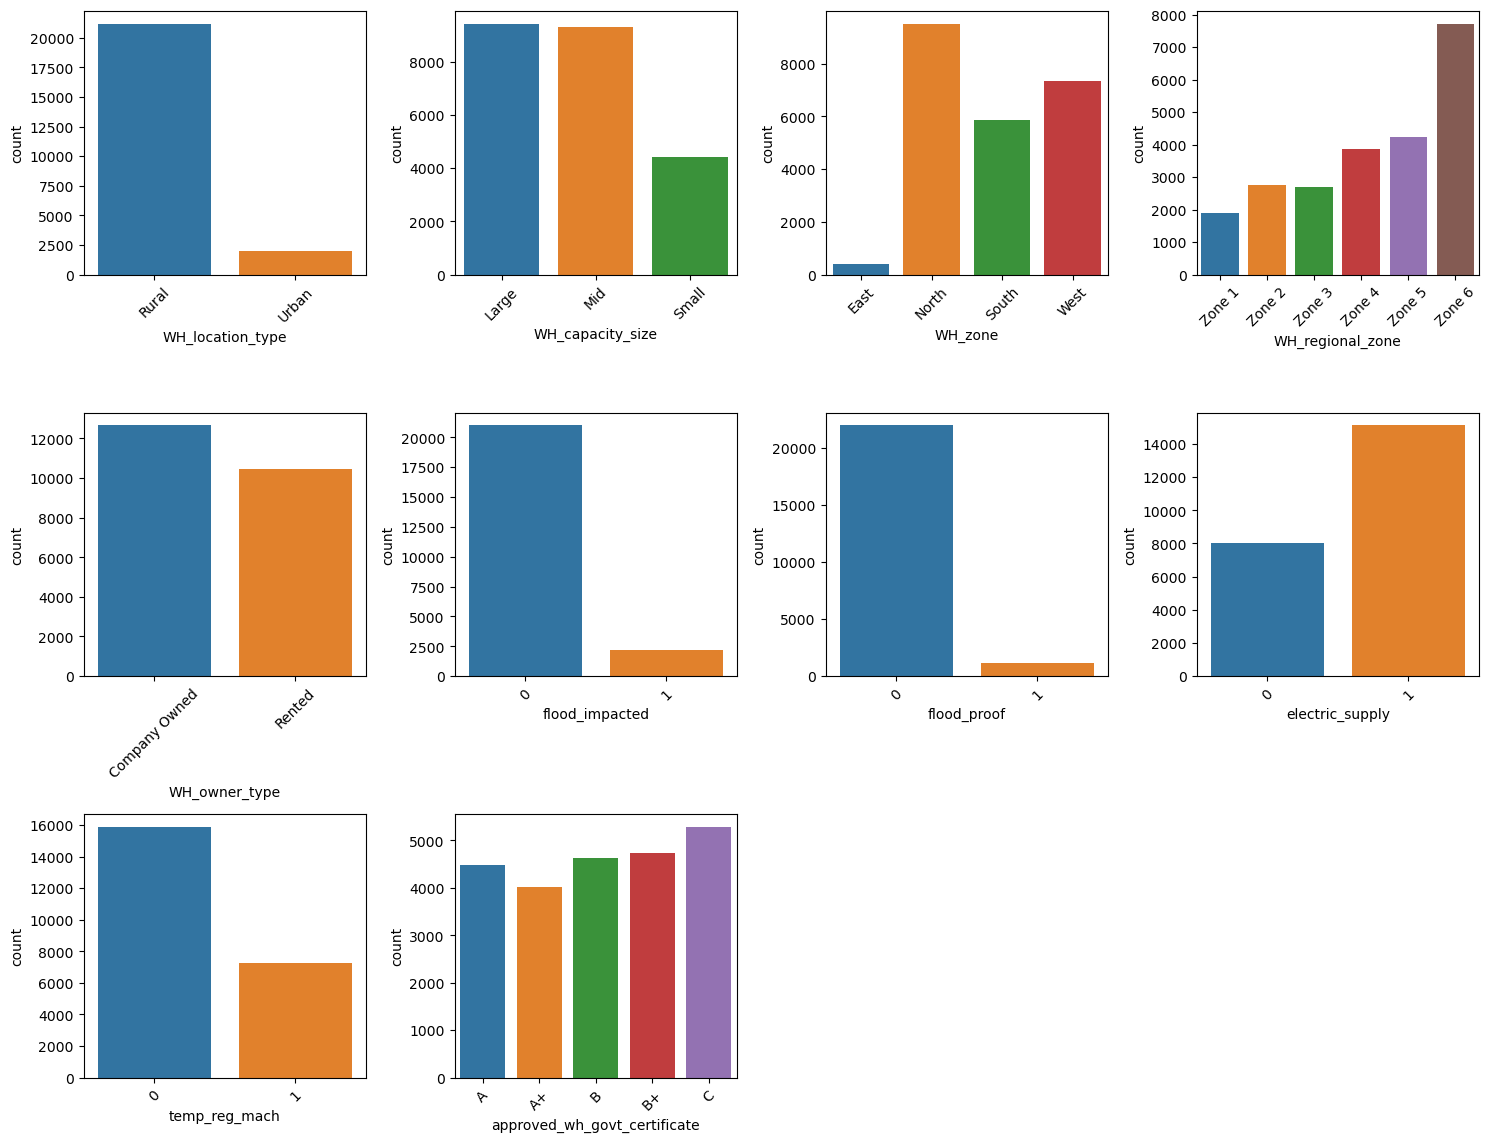

In [21]:
categorical_columns = df_copy.select_dtypes(include=['category']).columns.tolist()

# Create subplots
plt.figure(figsize=(15, 15))

# Loop through categorical columns and create subplots
for i, column in enumerate(categorical_columns):
    plt.subplot(4,4, i + 1)
    sns.countplot(data=df_copy, x=column)
    plt.xticks(rotation=45)

# Adjust layout
plt.tight_layout()

# Saving the plot for reusing in PPT
plt.savefig('uni_cat.png')

# Show the plot
plt.show()


#### 2 (b) Univariate graphical EDA for Numerical Data

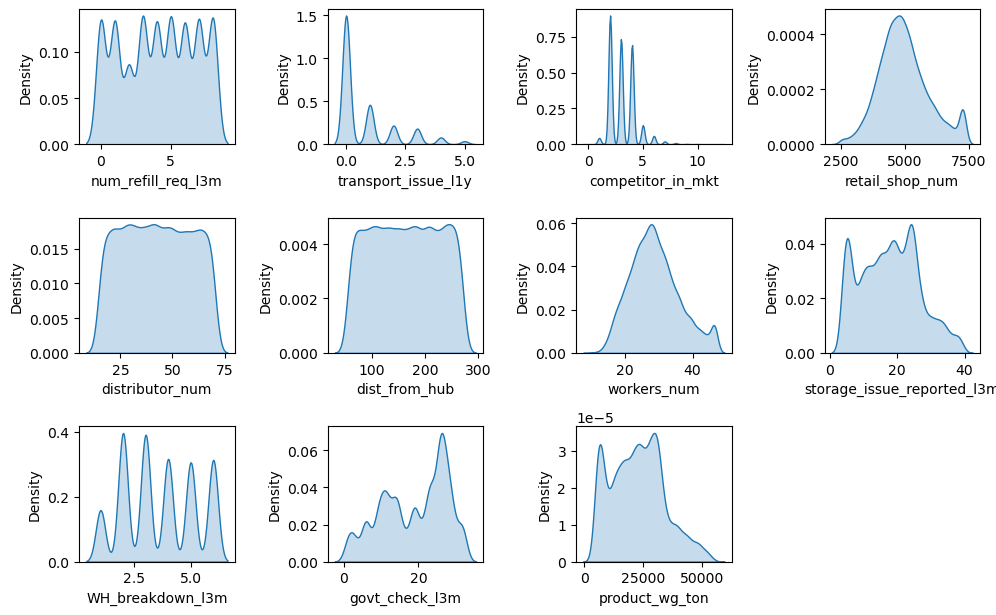

In [23]:
# Get columns with numerical data type
numerical_columns = df_copy.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Create subplots
plt.figure(figsize=(10, 10))

# Loop through numerical columns and create subplots
for i, column in enumerate(numerical_columns):
    plt.subplot(5,4, i + 1)
    sns.kdeplot(data=df_copy, x=column,fill=True)

# Adjust layout
plt.tight_layout()

# Saving the plot for reusing in PPT
plt.savefig('uni_num.png')

# Show the plot
plt.show()

#### 3.(a) Bivariate analysis with Categorical Values

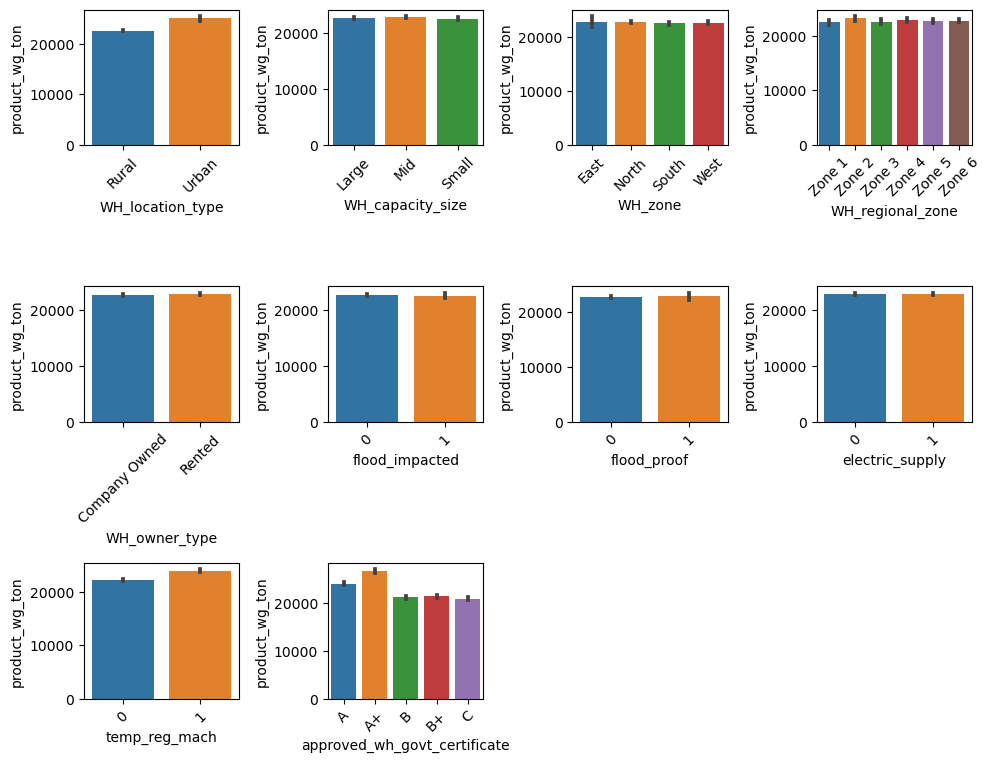

In [24]:
# Specify the target variable
target_variable = 'product_wg_ton'

# Get columns with categorical data type
categorical_columns = df_copy.select_dtypes(include=['category']).columns.tolist()

# Create subplots
plt.figure(figsize=(10, 10))

# Loop through categorical columns and create subplots
for i, column in enumerate(categorical_columns):
    plt.subplot(4, 4, i + 1)
    sns.barplot(data=df_copy, x=column, y=target_variable)
    plt.xticks(rotation=45)

# Adjust layout
plt.tight_layout()

# Saving the plot for reusing in PPT
plt.savefig('bi_cat.png')

# Show the plot
plt.show()


#### 3.(b) Bivariate analysis with Numerical Values

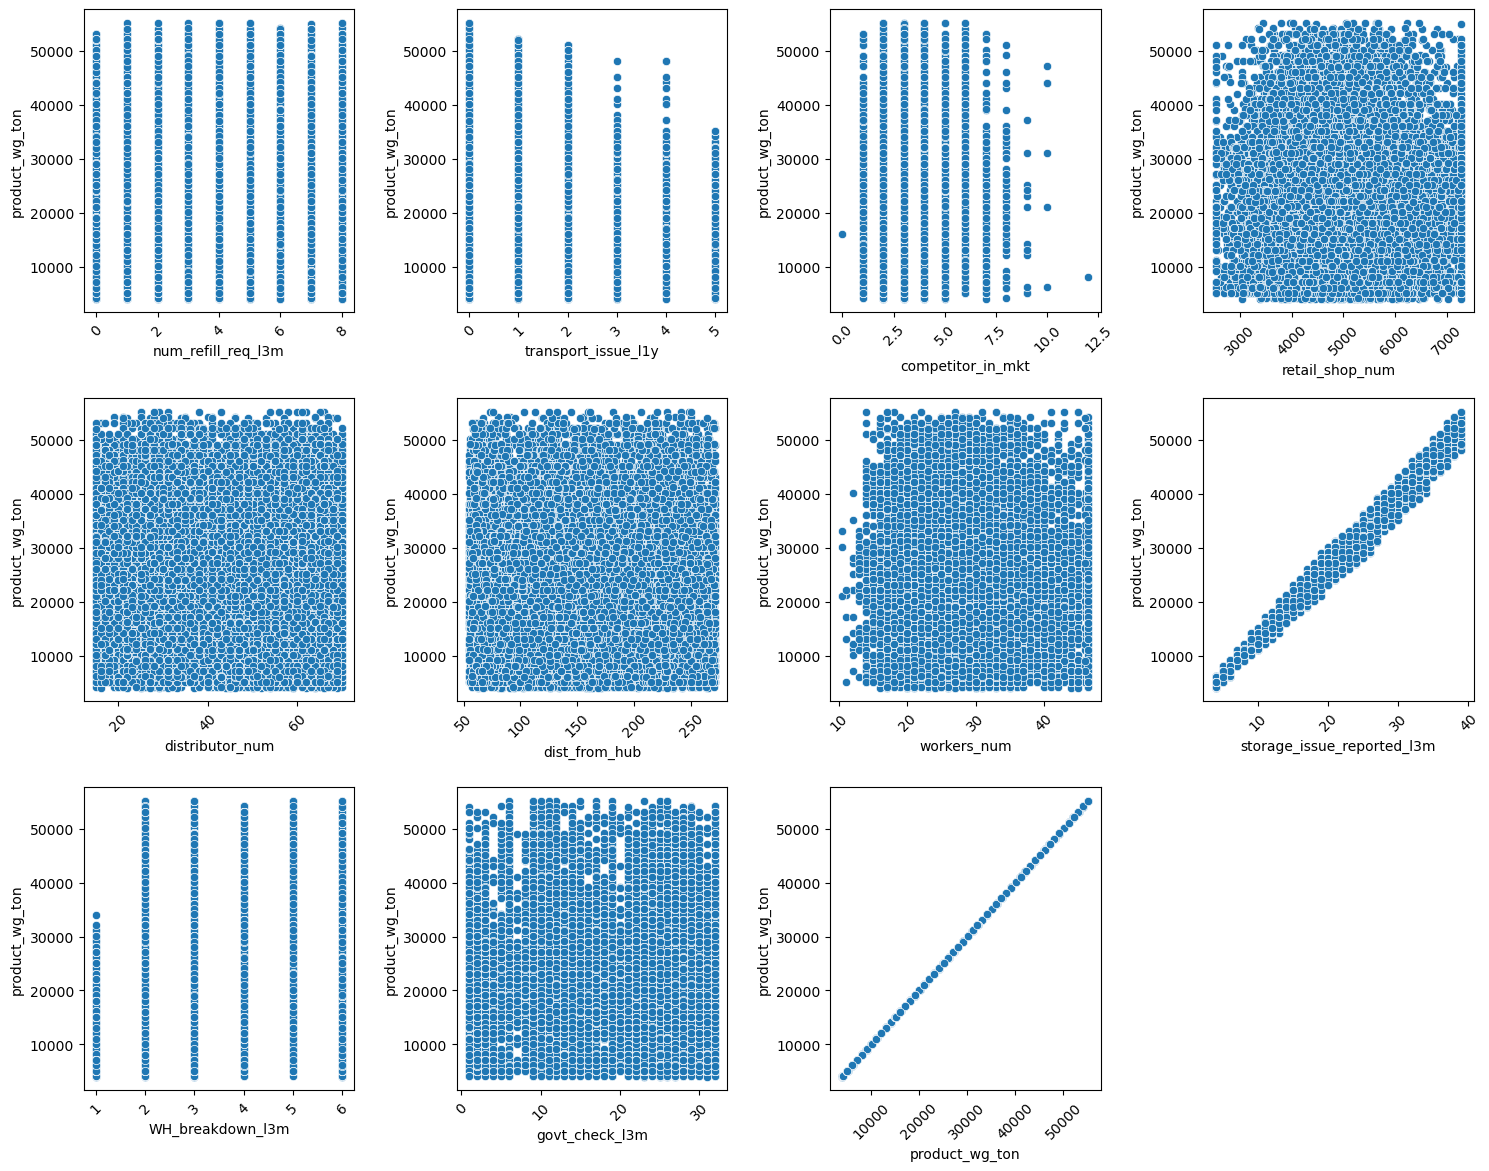

In [25]:
# Specify the target variable
target_variable = 'product_wg_ton'

# Get columns with numerical data type
numerical_columns = df_copy.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Create subplots
plt.figure(figsize=(15, 15))

# Loop through numerical columns and create subplots
for i, column in enumerate(numerical_columns):
    plt.subplot(4, 4, i + 1)
    sns.scatterplot(data=df_copy, x=column, y=target_variable)
    plt.xticks(rotation=45)

# Adjust layout
plt.tight_layout()

# Saving the plot for reusing in PPT
plt.savefig('bi_num.png')

# Show the plot
plt.show()


#### 3. Multivariate graphical EDA

#### a. Pair Plot

<Figure size 1500x1500 with 0 Axes>

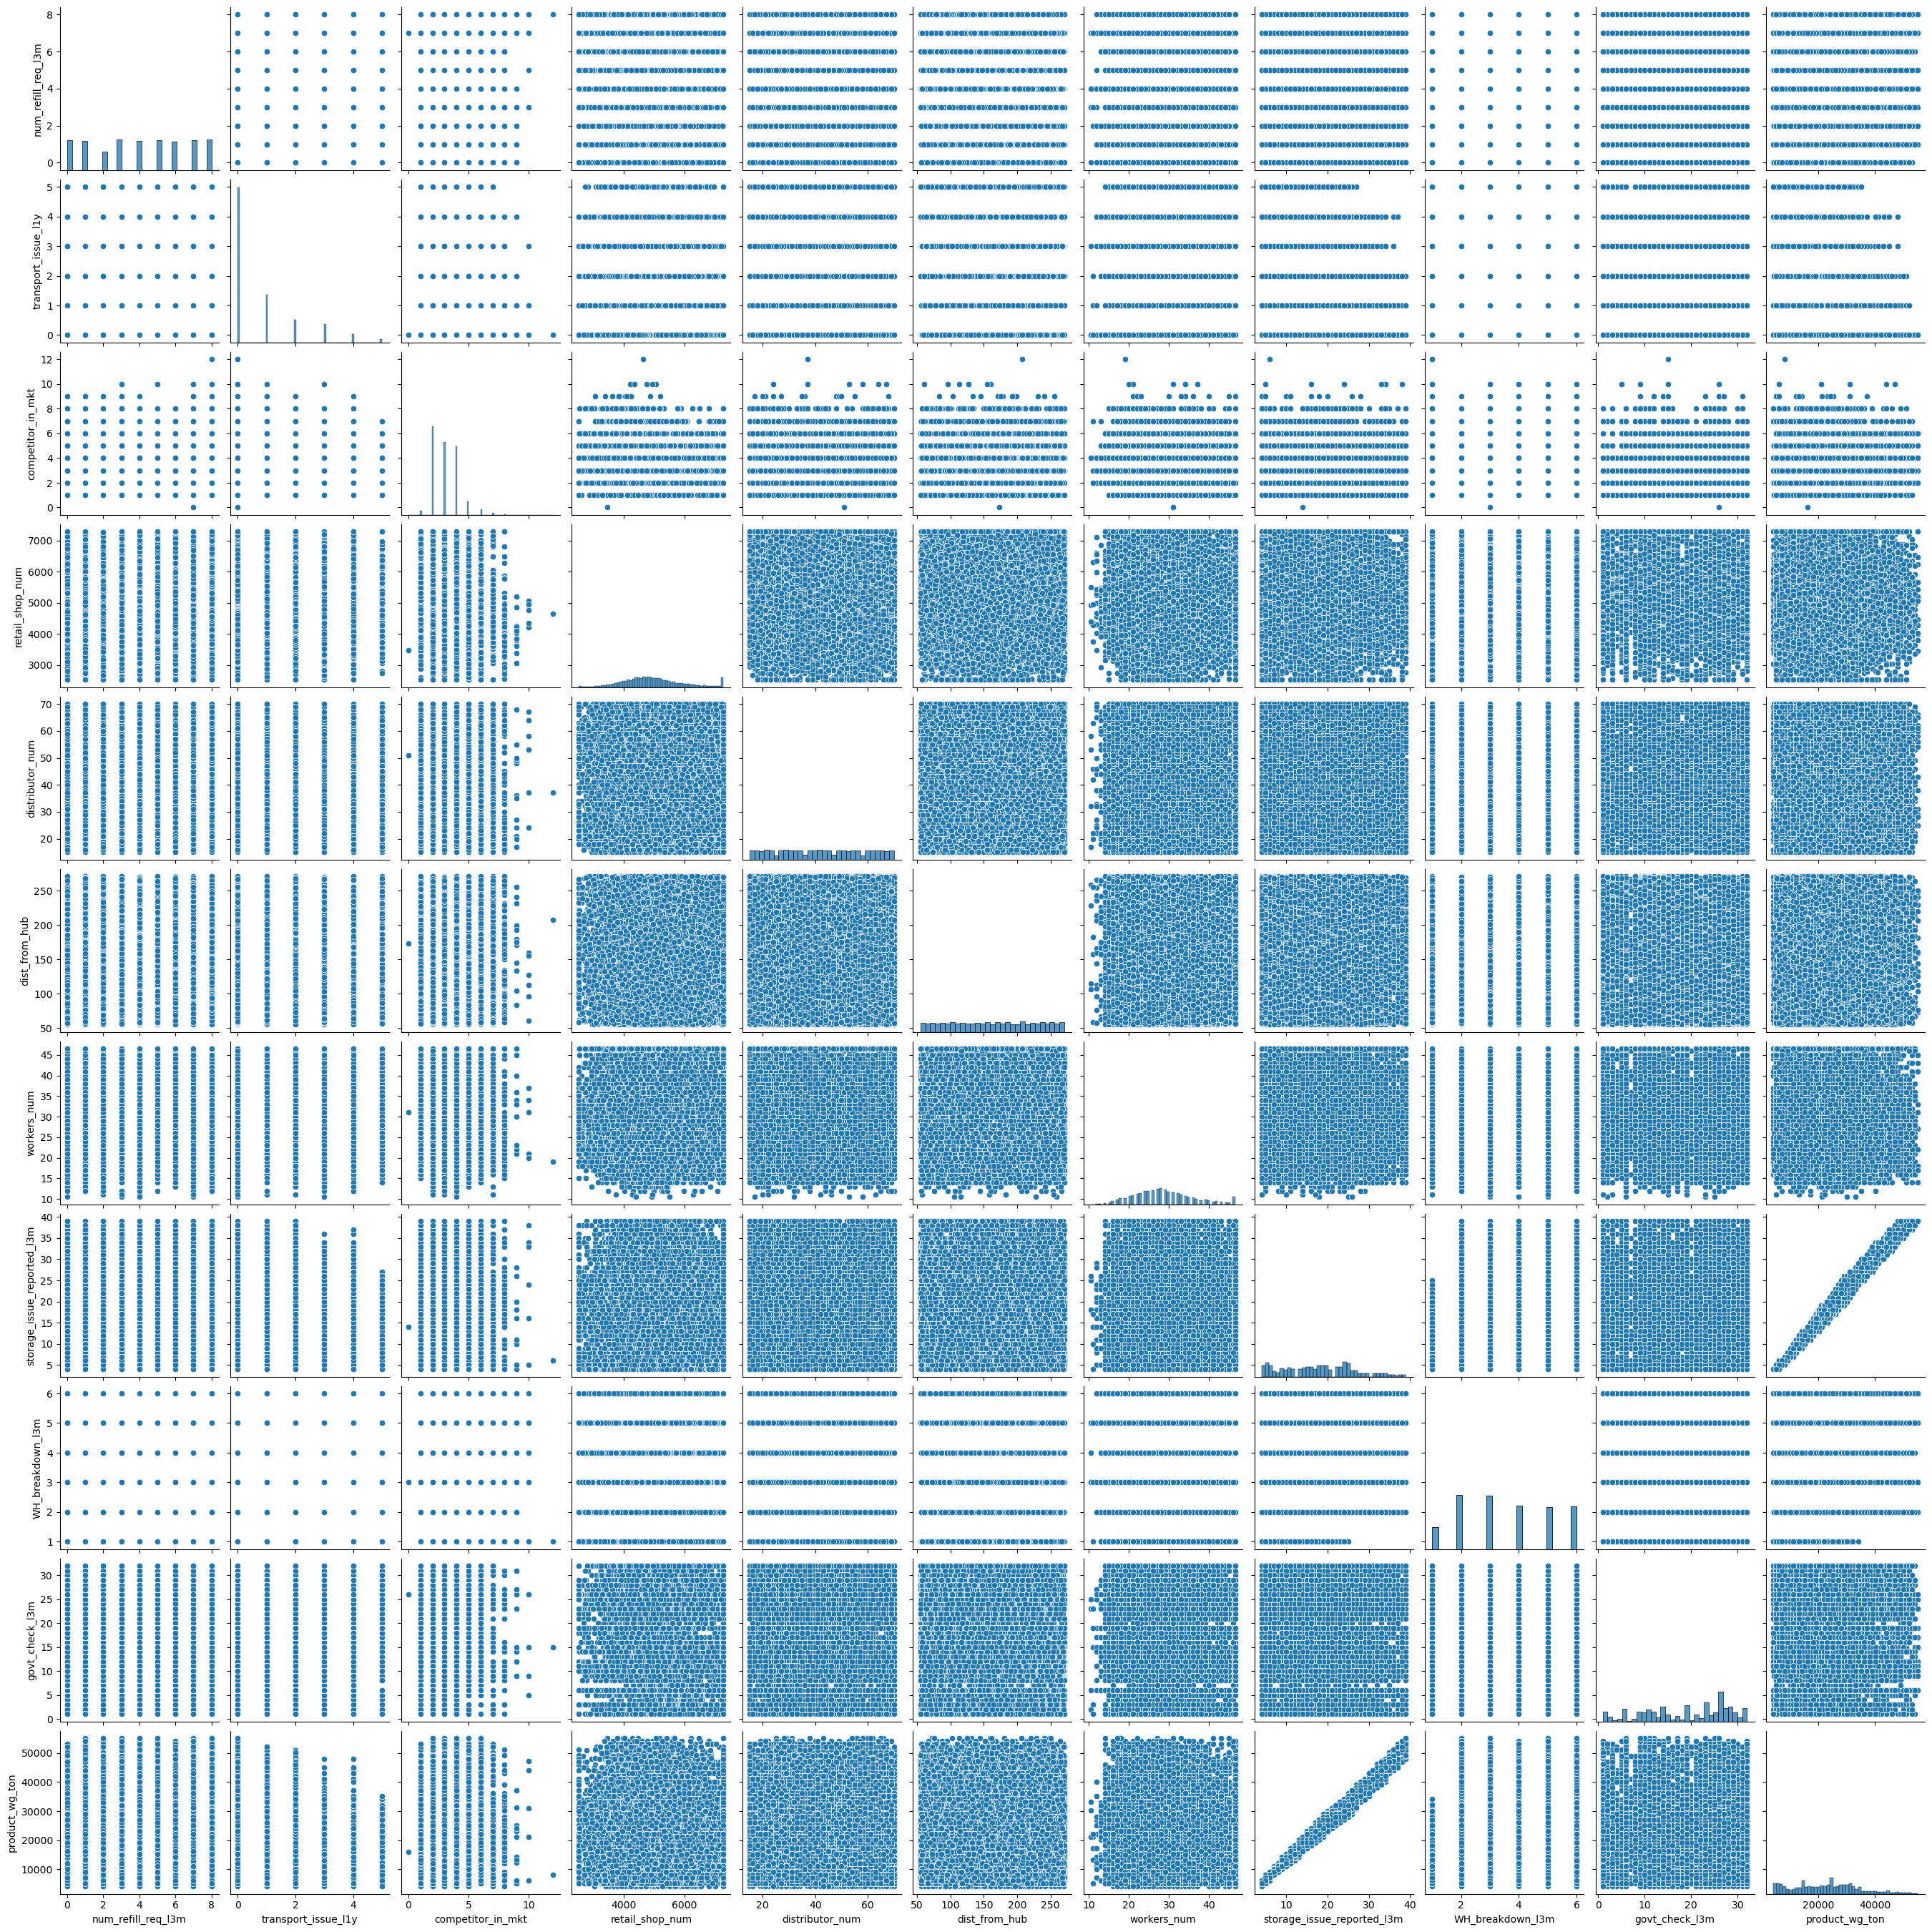

In [26]:
plt.figure(figsize=(15, 15))
sns.pairplot(df_copy)
plt.show()

#### b. Heat Map

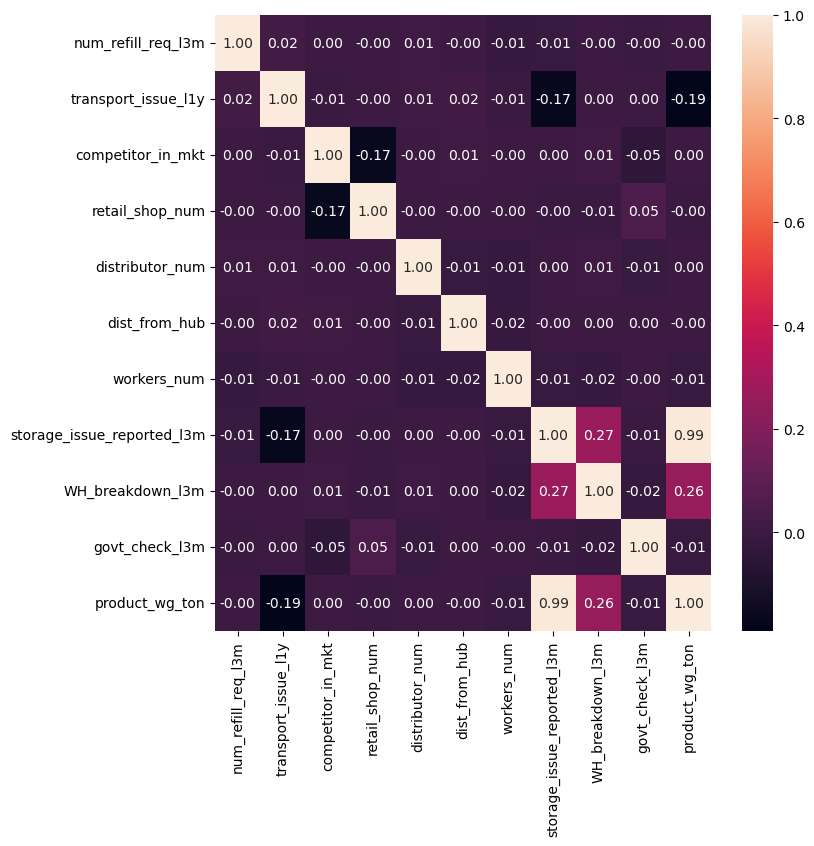

In [27]:
corr = df_copy.corr()

plt.figure(figsize=(8,8))
sns.heatmap(corr, fmt='.2f', annot=True);
plt.show()

#### 4. Encoding Categorical Values

In [28]:
# After analysis, revert the data types back to integer, which we previously converted to category.
# 'electric_supply','flood_impacted','flood_proof','temp_reg_mach'

for column in columns_to_convert:
    df_copy[column] = df_copy[column].astype(int)

In [29]:
# Get columns with categorical data type
# categorical_columns = df_copy.select_dtypes(include=['category']).columns.tolist()
# print(categorical_columns)

# Create a LabelEncoder instance
label_encoder = LabelEncoder()

# Apply label encoding to each categorical column
for column in categorical_columns:
    df_copy[column] = label_encoder.fit_transform(df_copy[column])

# Display the updated DataFrame
df_copy.head()

WH_location_type  WH_capacity_size  WH_zone  WH_regional_zone  \
0                 1                 2        3                 5   
1                 0                 0        1                 4   
2                 0                 1        2                 1   
3                 0                 1        1                 2   
4                 0                 0        1                 4   

   num_refill_req_l3m  transport_issue_l1y  competitor_in_mkt  \
0                   3                    1                  2   
1                   0                    0                  4   
2                   1                    0                  4   
3                   7                    4                  2   
4                   3                    1                  2   

   retail_shop_num  WH_owner_type  distributor_num  ...  flood_proof  \
0           4651.0              1               24  ...            1   
1           6217.0              0               47  ...            0   
2           4306.0              0               64  ...            0   
3           6000.0              1               50  ...            0   
4           4740.0              0               42  ...            0   

   electric_supply  dist_from_hub  workers_num  storage_issue_reported_l3m  \
0                1             91         29.0                          13   
1                1            210         31.0                           4   
2                0            161         37.0                          17   
3                0            103         21.0                          17   
4                1            112         25.0                          18   

   temp_reg_mach  approved_wh_govt_certificate  WH_breakdown_l3m  \
0              0                             0                 5   
1              0                             0                 3   
2              0                             0                 6   
3              1                             1                 3   
4              0                             4                 6   

   govt_check_l3m  product_wg_ton  
0              15           17115  
1              17            5074  
2              22           23137  
3              27           22115  
4              24           24071  

[5 rows x 21 columns]

#### 5. Further Analysis

<Axes: xlabel='WH_capacity_size', ylabel='product_wg_ton'>

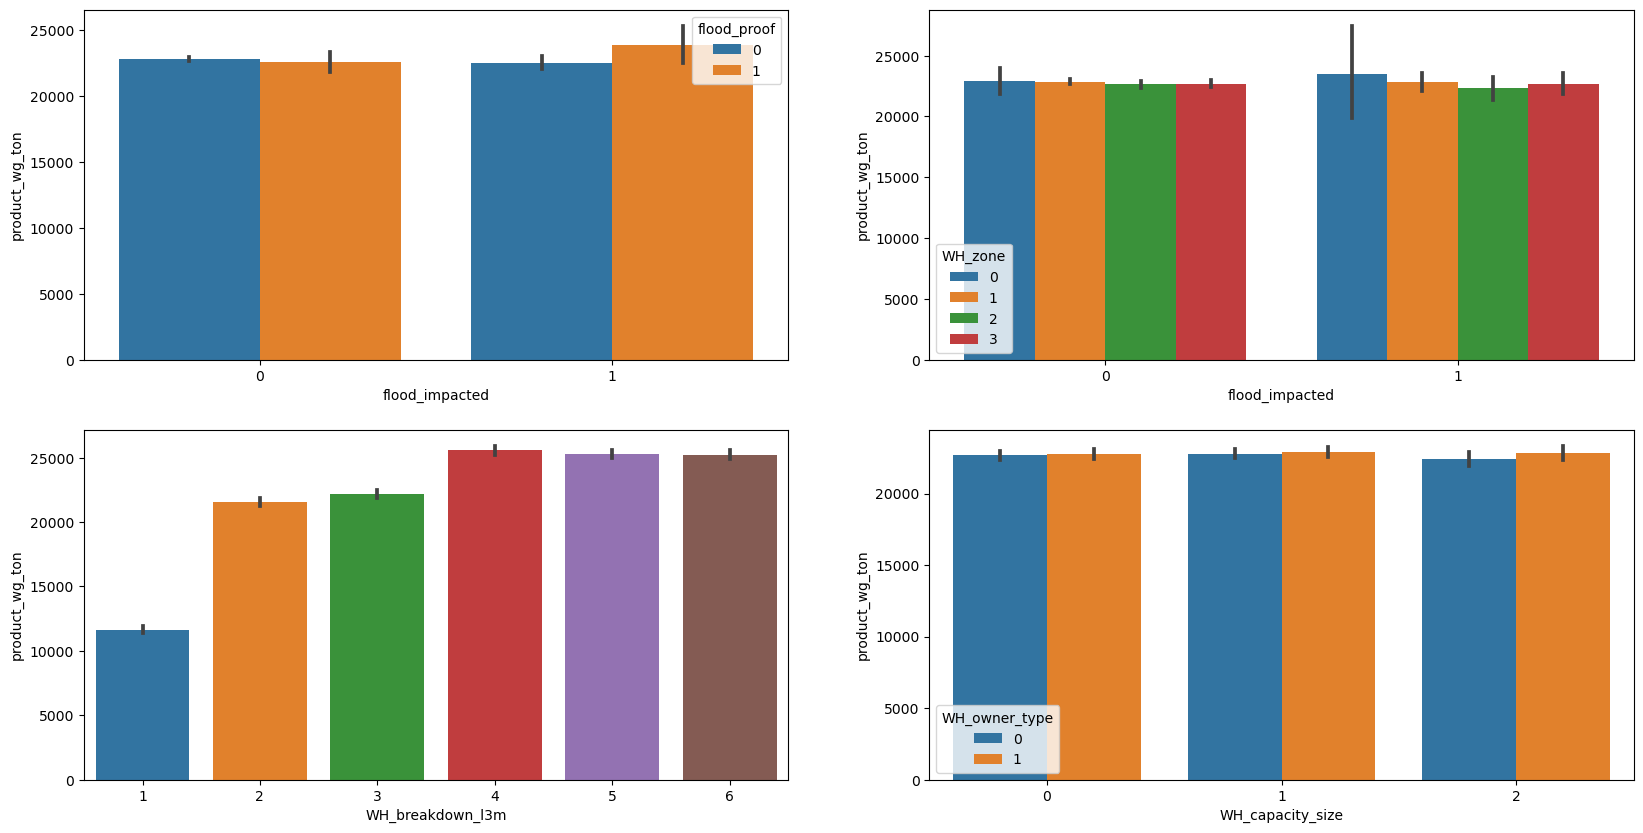

In [30]:
fig, axes = plt.subplots(nrows=2,ncols=2)
fig.set_size_inches(20,10)
sns.barplot(x='flood_impacted',y='product_wg_ton',hue='flood_proof', data=df_copy, ax=axes[0][0])
sns.barplot(x='flood_impacted',y='product_wg_ton',hue='WH_zone', data=df_copy, ax=axes[0][1])
sns.barplot(x='WH_breakdown_l3m', y='product_wg_ton', data=df_copy, ax=axes[1][0])
sns.barplot(x='WH_capacity_size',y='product_wg_ton',hue='WH_owner_type', data=df_copy, ax=axes[1][1])
# sns.barplot(x='transport_issue_l1y',y='WH_breakdown_l3m',data=df_copy,ax=axes[2][0])

### Feature Selection

In [31]:
# Identifying Features and Target variables

X = df_copy.iloc[:,:-1].drop(columns=['transport_issue_l1y','distributor_num','retail_shop_num','dist_from_hub','competitor_in_mkt'])
y = df_copy.iloc[:,-1:]

display(X.head())
display(y.head())

WH_location_type  WH_capacity_size  WH_zone  WH_regional_zone  \
0                 1                 2        3                 5   
1                 0                 0        1                 4   
2                 0                 1        2                 1   
3                 0                 1        1                 2   
4                 0                 0        1                 4   

   num_refill_req_l3m  WH_owner_type  flood_impacted  flood_proof  \
0                   3              1               0            1   
1                   0              0               0            0   
2                   1              0               0            0   
3                   7              1               0            0   
4                   3              0               1            0   

   electric_supply  workers_num  storage_issue_reported_l3m  temp_reg_mach  \
0                1         29.0                          13              0   
1                1         31.0                           4              0   
2                0         37.0                          17              0   
3                0         21.0                          17              1   
4                1         25.0                          18              0   

   approved_wh_govt_certificate  WH_breakdown_l3m  govt_check_l3m  
0                             0                 5              15  
1                             0                 3              17  
2                             0                 6              22  
3                             1                 3              27  
4                             4                 6              24

product_wg_ton
0           17115
1            5074
2           23137
3           22115
4           24071

### Preprocessing

#### 1. Split dataset into train and test

In [32]:
# Split X and y into training and test set in 80:20 ratio

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=1)

In [33]:
# # Get columns with categorical data type
categorical_columns = df_copy.select_dtypes(include=['category']).columns.tolist()
print(categorical_columns)

# # Create a LabelEncoder instance
# label_encoder = LabelEncoder()

# # Apply label encoding to each categorical column
# for column in categorical_columns:
#     df_copy[column] = label_encoder.fit_transform(df_copy[column])

# # Display the updated DataFrame
# df_copy.head()

[]


#### 2. Label Encoding after splitting the data into train and test to avoid data leakage

In [34]:
label_encoder = LabelEncoder()

# Fit and transform label encoding on training data
for feature in categorical_columns:
    X_train[feature] = label_encoder.fit_transform(X_train[feature])

# Transform label encoding on testing data using the same label_encoder instance
for feature in categorical_columns:
    X_test[feature] = label_encoder.transform(X_test[feature])

### Modelling

#### 1. Linear Regression

In [35]:
# Create a LinearRegression model
lr = LinearRegression()

# Fit the model to the training data
lr.fit(X_train, y_train)

# Make predictions on the training data
y_pred_train = lr.predict(X_train)

# Make predictions on the test data
y_pred_test = lr.predict(X_test)

mae_train = np.around(mean_absolute_error(y_train, y_pred_train), 2)
mse_train = np.around(mean_squared_error(y_train, y_pred_train), 2)
rmse_train = np.around(np.sqrt(mean_squared_error(y_train, y_pred_train)), 2)
r2_train = np.around(r2_score(y_train, y_pred_train), 2)

mae_test = np.around(mean_absolute_error(y_test, y_pred_test), 2)
mse_test = np.around(mean_squared_error(y_test, y_pred_test), 2)
rmse_test = np.around(np.sqrt(mean_squared_error(y_test, y_pred_test)), 2)
r2_test = np.around(r2_score(y_test, y_pred_test), 2)

# Create a DataFrame to store the results
results = pd.DataFrame([[mae_train, mae_test, mse_train, mse_test,
                         rmse_train, rmse_test, r2_train, r2_test]],
                          columns=['MAE (Train)','MAE (Test)', 'MSE (Train)', 'MSE (Test)',
                                   'RMSE (Train)',  'RMSE (Test)','R2 (Train)','R2 (Test)'],
                          index=['Linear Regression'])

# Print the results
display(results)


MAE (Train)  MAE (Test)  MSE (Train)  MSE (Test)  \
Linear Regression      1090.33     1085.31   2019429.97  1992238.33   

                   RMSE (Train)  RMSE (Test)  R2 (Train)  R2 (Test)  
Linear Regression       1421.07      1411.47        0.98       0.98

#### 2. Ridge Regression

In [37]:
# Create a Lasso model
ridge = Ridge()

# Fit the model to the training data
ridge.fit(X_train, y_train)

# Make predictions on the training data
y_pred_train = ridge.predict(X_train)

# Make predictions on the test data
y_pred_test = ridge.predict(X_test)

mae_train = np.around(mean_absolute_error(y_train, y_pred_train), 2)
mse_train = np.around(mean_squared_error(y_train, y_pred_train), 2)
rmse_train = np.around(np.sqrt(mean_squared_error(y_train, y_pred_train)), 2)
r2_train = np.around(r2_score(y_train, y_pred_train), 2)

mae_test = np.around(mean_absolute_error(y_test, y_pred_test), 2)
mse_test = np.around(mean_squared_error(y_test, y_pred_test), 2)
rmse_test = np.around(np.sqrt(mean_squared_error(y_test, y_pred_test)), 2)
r2_test = np.around(r2_score(y_test, y_pred_test), 2)

# Create a DataFrame to store the results
ridge_results = pd.DataFrame([[mae_train, mae_test, mse_train, mse_test,
                         rmse_train, rmse_test, r2_train, r2_test]],
                          columns=['MAE (Train)','MAE (Test)', 'MSE (Train)', 'MSE (Test)',
                                   'RMSE (Train)',  'RMSE (Test)','R2 (Train)','R2 (Test)'],
                          index=['Ridge Regression'])
results = pd.concat([results, ridge_results], axis=0)

# Print the results
display(results)


MAE (Train)  MAE (Test)  MSE (Train)  MSE (Test)  \
Linear Regression      1090.33     1085.31   2019429.97  1992238.33   
Ridge Regression       1090.32     1085.30   2019430.00  1992248.46   

                   RMSE (Train)  RMSE (Test)  R2 (Train)  R2 (Test)  
Linear Regression       1421.07      1411.47        0.98       0.98  
Ridge Regression        1421.07      1411.47        0.98       0.98

In [39]:
# Create a Lasso model
lasso = Lasso()

# Fit the model to the training data
lasso.fit(X_train, y_train)

# Make predictions on the training data
y_pred_train = lasso.predict(X_train)

# Make predictions on the test data
y_pred_test = lasso.predict(X_test)

mae_train = np.around(mean_absolute_error(y_train, y_pred_train), 2)
mse_train = np.around(mean_squared_error(y_train, y_pred_train), 2)
rmse_train = np.around(np.sqrt(mean_squared_error(y_train, y_pred_train)), 2)
r2_train = np.around(r2_score(y_train, y_pred_train), 2)

mae_test = np.around(mean_absolute_error(y_test, y_pred_test), 2)
mse_test = np.around(mean_squared_error(y_test, y_pred_test), 2)
rmse_test = np.around(np.sqrt(mean_squared_error(y_test, y_pred_test)), 2)
r2_test = np.around(r2_score(y_test, y_pred_test), 2)

# Create a DataFrame to store the results
lasso_results = pd.DataFrame([[mae_train, mae_test, mse_train, mse_test,
                         rmse_train, rmse_test, r2_train, r2_test]],
                          columns=['MAE (Train)','MAE (Test)', 'MSE (Train)', 'MSE (Test)',
                                   'RMSE (Train)',  'RMSE (Test)','R2 (Train)','R2 (Test)'],
                          index=['Lasso Regression'])
results = pd.concat([results, lasso_results], axis=0)

# Print the results
display(results)


MAE (Train)  MAE (Test)  MSE (Train)  MSE (Test)  \
Linear Regression      1090.33     1085.31   2019429.97  1992238.33   
Ridge Regression       1090.32     1085.30   2019430.00  1992248.46   
Lasso Regression       1090.19     1085.28   2019483.16  1992635.58   
Lasso Regression       1090.19     1085.28   2019483.16  1992635.58   

                   RMSE (Train)  RMSE (Test)  R2 (Train)  R2 (Test)  
Linear Regression       1421.07      1411.47        0.98       0.98  
Ridge Regression        1421.07      1411.47        0.98       0.98  
Lasso Regression        1421.09      1411.61        0.98       0.98  
Lasso Regression        1421.09      1411.61        0.98       0.98

In [40]:
# Create a DecisionTreeRegressor model
dt_regressor = DecisionTreeRegressor()

# Fit the model to the training data
dt_regressor.fit(X_train, y_train)

# Make predictions on the training data
y_pred_train = dt_regressor.predict(X_train)

# Make predictions on the test data
y_pred_test = dt_regressor.predict(X_test)

mae_train = np.around(mean_absolute_error(y_train, y_pred_train), 2)
mse_train = np.around(mean_squared_error(y_train, y_pred_train), 2)
rmse_train = np.around(np.sqrt(mean_squared_error(y_train, y_pred_train)), 2)
r2_train = np.around(r2_score(y_train, y_pred_train), 2)

mae_test = np.around(mean_absolute_error(y_test, y_pred_test), 2)
mse_test = np.around(mean_squared_error(y_test, y_pred_test), 2)
rmse_test = np.around(np.sqrt(mean_squared_error(y_test, y_pred_test)), 2)
r2_test = np.around(r2_score(y_test, y_pred_test), 2)

# Create a DataFrame to store the results
dt_results = pd.DataFrame([[mae_train, mae_test, mse_train, mse_test,
                            rmse_train, rmse_test, r2_train, r2_test]],
                          columns=['MAE (Train)', 'MAE (Test)', 'MSE (Train)', 'MSE (Test)',
                                   'RMSE (Train)',  'RMSE (Test)', 'R2 (Train)', 'R2 (Test)'],
                          index=['Decision Tree Regressor'])

# Concatenate the results to the existing DataFrame
results = pd.concat([results, dt_results])

# Print the results
display(results)


MAE (Train)  MAE (Test)  MSE (Train)  MSE (Test)  \
Linear Regression            1090.33     1085.31   2019429.97  1992238.33   
Ridge Regression             1090.32     1085.30   2019430.00  1992248.46   
Lasso Regression             1090.19     1085.28   2019483.16  1992635.58   
Lasso Regression             1090.19     1085.28   2019483.16  1992635.58   
Decision Tree Regressor         0.37      926.71       417.16  1664489.70   

                         RMSE (Train)  RMSE (Test)  R2 (Train)  R2 (Test)  
Linear Regression             1421.07      1411.47        0.98       0.98  
Ridge Regression              1421.07      1411.47        0.98       0.98  
Lasso Regression              1421.09      1411.61        0.98       0.98  
Lasso Regression              1421.09      1411.61        0.98       0.98  
Decision Tree Regressor         20.42      1290.15        1.00       0.99

In [41]:
# Create a RandomForestRegressor model
rf_regressor = RandomForestRegressor()

# Fit the model to the training data
rf_regressor.fit(X_train, y_train)

# Make predictions on the training data
y_pred_train = rf_regressor.predict(X_train)

# Make predictions on the test data
y_pred_test = rf_regressor.predict(X_test)

mae_train = np.around(mean_absolute_error(y_train, y_pred_train), 2)
mse_train = np.around(mean_squared_error(y_train, y_pred_train), 2)
rmse_train = np.around(np.sqrt(mean_squared_error(y_train, y_pred_train)), 2)
r2_train = np.around(r2_score(y_train, y_pred_train), 2)

mae_test = np.around(mean_absolute_error(y_test, y_pred_test), 2)
mse_test = np.around(mean_squared_error(y_test, y_pred_test), 2)
rmse_test = np.around(np.sqrt(mean_squared_error(y_test, y_pred_test)), 2)
r2_test = np.around(r2_score(y_test, y_pred_test), 2)

# Create a DataFrame to store the results
rf_results = pd.DataFrame([[mae_train, mae_test, mse_train, mse_test,
                            rmse_train, rmse_test, r2_train, r2_test]],
                          columns=['MAE (Train)', 'MAE (Test)', 'MSE (Train)', 'MSE (Test)',
                                   'RMSE (Train)',  'RMSE (Test)', 'R2 (Train)', 'R2 (Test)'],
                          index=['Random Forest Regressor'])

# Concatenate the results to the existing DataFrame
results = pd.concat([results, rf_results])

# Print the results
display(results)

MAE (Train)  MAE (Test)  MSE (Train)  MSE (Test)  \
Linear Regression            1090.33     1085.31   2019429.97  1992238.33   
Ridge Regression             1090.32     1085.30   2019430.00  1992248.46   
Lasso Regression             1090.19     1085.28   2019483.16  1992635.58   
Lasso Regression             1090.19     1085.28   2019483.16  1992635.58   
Decision Tree Regressor         0.37      926.71       417.16  1664489.70   
Random Forest Regressor       276.82      751.27    127162.83   927190.06   

                         RMSE (Train)  RMSE (Test)  R2 (Train)  R2 (Test)  
Linear Regression             1421.07      1411.47        0.98       0.98  
Ridge Regression              1421.07      1411.47        0.98       0.98  
Lasso Regression              1421.09      1411.61        0.98       0.98  
Lasso Regression              1421.09      1411.61        0.98       0.98  
Decision Tree Regressor         20.42      1290.15        1.00       0.99  
Random Forest Regressor        356.60       962.91        1.00       0.99

In [42]:
from sklearn.neighbors import KNeighborsRegressor

# Create a KNeighborsRegressor model
knn_regressor = KNeighborsRegressor()

# Fit the model to the training data
knn_regressor.fit(X_train, y_train)

# Make predictions on the training data
y_pred_train = knn_regressor.predict(X_train)

# Make predictions on the test data
y_pred_test = knn_regressor.predict(X_test)

mae_train = np.around(mean_absolute_error(y_train, y_pred_train), 2)
mse_train = np.around(mean_squared_error(y_train, y_pred_train), 2)
rmse_train = np.around(np.sqrt(mean_squared_error(y_train, y_pred_train)), 2)

r2_train = np.around(r2_score(y_train, y_pred_train), 2)

mae_test = np.around(mean_absolute_error(y_test, y_pred_test), 2)
mse_test = np.around(mean_squared_error(y_test, y_pred_test), 2)
rmse_test = np.around(np.sqrt(mean_squared_error(y_test, y_pred_test)), 2)
r2_test = np.around(r2_score(y_test, y_pred_test), 2)

# Create a DataFrame to store the results
knn_results = pd.DataFrame([[mae_train, mae_test, mse_train, mse_test,
                             rmse_train, rmse_test, r2_train, r2_test]],
                           columns=['MAE (Train)', 'MAE (Test)', 'MSE (Train)', 'MSE (Test)',
                                    'RMSE (Train)', 'RMSE (Test)', 'R2 (Train)', 'R2 (Test)'],
                           index=['K-Nearest Neighbors'])

# Concatenate the results to the existing DataFrame
results = pd.concat([results, knn_results])

# Print the results
display(results)


MAE (Train)  MAE (Test)  MSE (Train)  MSE (Test)  \
Linear Regression            1090.33     1085.31   2019429.97  1992238.33   
Ridge Regression             1090.32     1085.30   2019430.00  1992248.46   
Lasso Regression             1090.19     1085.28   2019483.16  1992635.58   
Lasso Regression             1090.19     1085.28   2019483.16  1992635.58   
Decision Tree Regressor         0.37      926.71       417.16  1664489.70   
Random Forest Regressor       276.82      751.27    127162.83   927190.06   
K-Nearest Neighbors          1064.69     1289.94   1907410.88  2803765.96   

                         RMSE (Train)  RMSE (Test)  R2 (Train)  R2 (Test)  
Linear Regression             1421.07      1411.47        0.98       0.98  
Ridge Regression              1421.07      1411.47        0.98       0.98  
Lasso Regression              1421.09      1411.61        0.98       0.98  
Lasso Regression              1421.09      1411.61        0.98       0.98  
Decision Tree Regressor         20.42      1290.15        1.00       0.99  
Random Forest Regressor        356.60       962.91        1.00       0.99  
K-Nearest Neighbors           1381.09      1674.44        0.99       0.98

In [44]:
accuracy_rate = []

# May take some time
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    score=cross_val_score(knn,df_feat,df['TARGET CLASS'],cv=10)
    accuracy_rate.append(score.mean())
    
error_rate = []

# May take some time
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    score=cross_val_score(knn,df_feat,df['TARGET CLASS'],cv=10)
    error_rate.append(1-score.mean())

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

Text(0, 0.5, 'Error Rate')

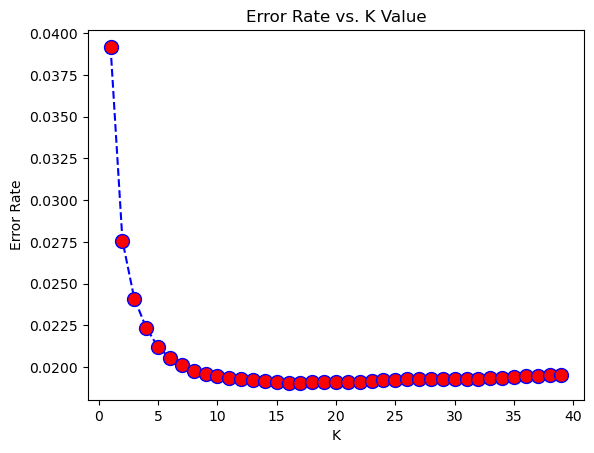

In [45]:
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
        markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

###### The optimum value for K is 5

In [51]:
a = '10.5'
b = float(a)
c = int(b)
print(type(c))

<class 'int'>


In [47]:
b = 10.5
a = int(b)
print(type(a))


<class 'int'>


In [54]:
a = 12345

num = 12345
rev = 0

while num != 0:
    rem = num%10
    rev = rev*10 + rem
    num = num // 10

print(rev)

54321
